### First add the data functions to the path

In [1]:
import sys
import numpy as np
import pandas as pd
import xarray as xr
import copy
import seaborn as sns
from netCDF4 import Dataset
from pathlib import Path
from datetime import datetime, timedelta
notebook_dir = !pwd # Replace with !echo %cd% if using windows
library_dir = Path(notebook_dir[0]).parent.absolute()
sys.path.append(str(library_dir))
data_raw_path = library_dir / 'data' / 'raw' / 'adcp'
glider_raw_path = Path('/media/callum/storage/Documents/Eureka/data/glider/sg637')
fig_path = library_dir / 'reports' / 'figures'
from src.data.adcp_mission_analysis import adcp_import_data, add_dive_averages, read_glider_nc, edgetocentre

In [2]:
def savefig(figname, extension="png"):
    plt.savefig(
        fig_path / str(figname + "." + extension),
        format=extension,
        dpi="figure",
        bbox_inches="tight",
    )

Use better plotting defaults

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
style_path = library_dir / 'src' / 'visualization' / 'presentation.mplstyle'
style.use(str(style_path))

### Load the data into Python

In [4]:
overview, mission_dict = adcp_import_data(data_raw_path, incorrect_beams=True)


311it [07:33,  1.46s/it]


Add beam attributes. These are taken from the fifth cell (11.3 m from the glider on default settings) and averaged over each ascent/descent profile

In [5]:
beam_attrs, adcp_df = add_dive_averages(overview, mission_dict)
beam_attrs
# overview.join(beam_attrs)

/media/callum/storage/Documents/adcp-glider/src/data/adcp_mission_analysis.py:414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beam_attrs["dive_num"][beam_attrs.index.str[-1] == "b"] += 0.5


,cor_beam_1,cor_beam_2,cor_beam_3,cor_beam_4,amp_beam_1,amp_beam_2,amp_beam_3,amp_beam_4,beam_miss,pitch,roll,heading,good_angle_5,good_angle_all,good_cor_5,good_cor_all,dive_num
0000a,NaN,3.266667,3.000000,3.400000,NaN,27.466667,27.100000,27.200000,3.095026,-46.674664,4.855333,127.181343,0.000000,0.000000,0.000000,0.000000,0.0
0001a,NaN,20.106383,16.425532,17.212766,NaN,29.670213,29.042553,29.351064,2.697399,-42.630852,4.440851,235.983398,6.382979,6.382979,16.879433,13.049645,1.0
0001b,46.821429,48.857143,NaN,46.321429,33.696429,33.294643,NaN,32.857143,1.875847,-12.929286,4.590000,184.708572,32.142857,5.357143,47.857143,36.428571,1.5
0002a,NaN,63.545455,62.800000,62.709091,NaN,34.881818,34.563636,34.345455,1.607731,-29.559093,5.614909,115.971268,40.000000,38.181818,66.545455,48.404040,2.0
0002b,88.183333,87.666667,NaN,86.350000,37.816667,37.258333,NaN,36.741667,0.898507,16.158834,5.542000,134.029495,60.000000,48.333333,92.555556,66.777778,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0153b,96.581395,96.069767,NaN,95.697674,42.767442,42.116279,NaN,41.523256,0.777380,25.423719,2.500698,106.601860,83.720930,0.000000,99.379845,84.702842,153.5
0154a,NaN,92.705882,93.235294,94.705882,NaN,39.029412,40.470588,39.705882,1.549429,-26.010000,3.985883,35.480000,47.058824,5.882353,99.215686,74.248366,154.0
0154b,95.785714,95.142857,NaN,95.142857,41.714286,41.000000,NaN,40.642857,0.983536,24.104288,4.052857,97.740715,64.285714,0.000000,99.523810,82.222222,154.5
0155a,NaN,93.888889,91.925926,93.592593,NaN,39.648148,40.092593,39.000000,1.377177,-26.317038,4.590370,180.342194,33.333333,0.000000,99.506173,76.131687,155.0


In [6]:
adcp_df.head()

,cast_num,pressure_ad,pitch_ad,roll_ad,heading_ad
2019-11-27 11:46:45.063199,0000a,1.872,-58.609997,-2.31,279.559998
2019-11-27 11:46:46.063199,0000a,1.894,-58.590000,-2.34,279.649994
2019-11-27 11:46:47.063199,0000a,1.907,-58.590000,-2.34,278.329987
2020-01-19 13:37:16.063199,0000a,2.228,-43.169998,-6.47,89.809998
2020-01-19 13:37:17.063300,0000a,2.159,-42.419998,-5.19,88.759995


Check that the data start when you expect. The first file in particular may have data from a previous sim dive or bench test. adapt the following cell to select the data starting on the correct day

In [7]:
# For this dataset, need to remove the data before 23 Jan, they are from 2019 benchtests and 2020 sim dives
adcp_df = adcp_df['2020-01-23':]

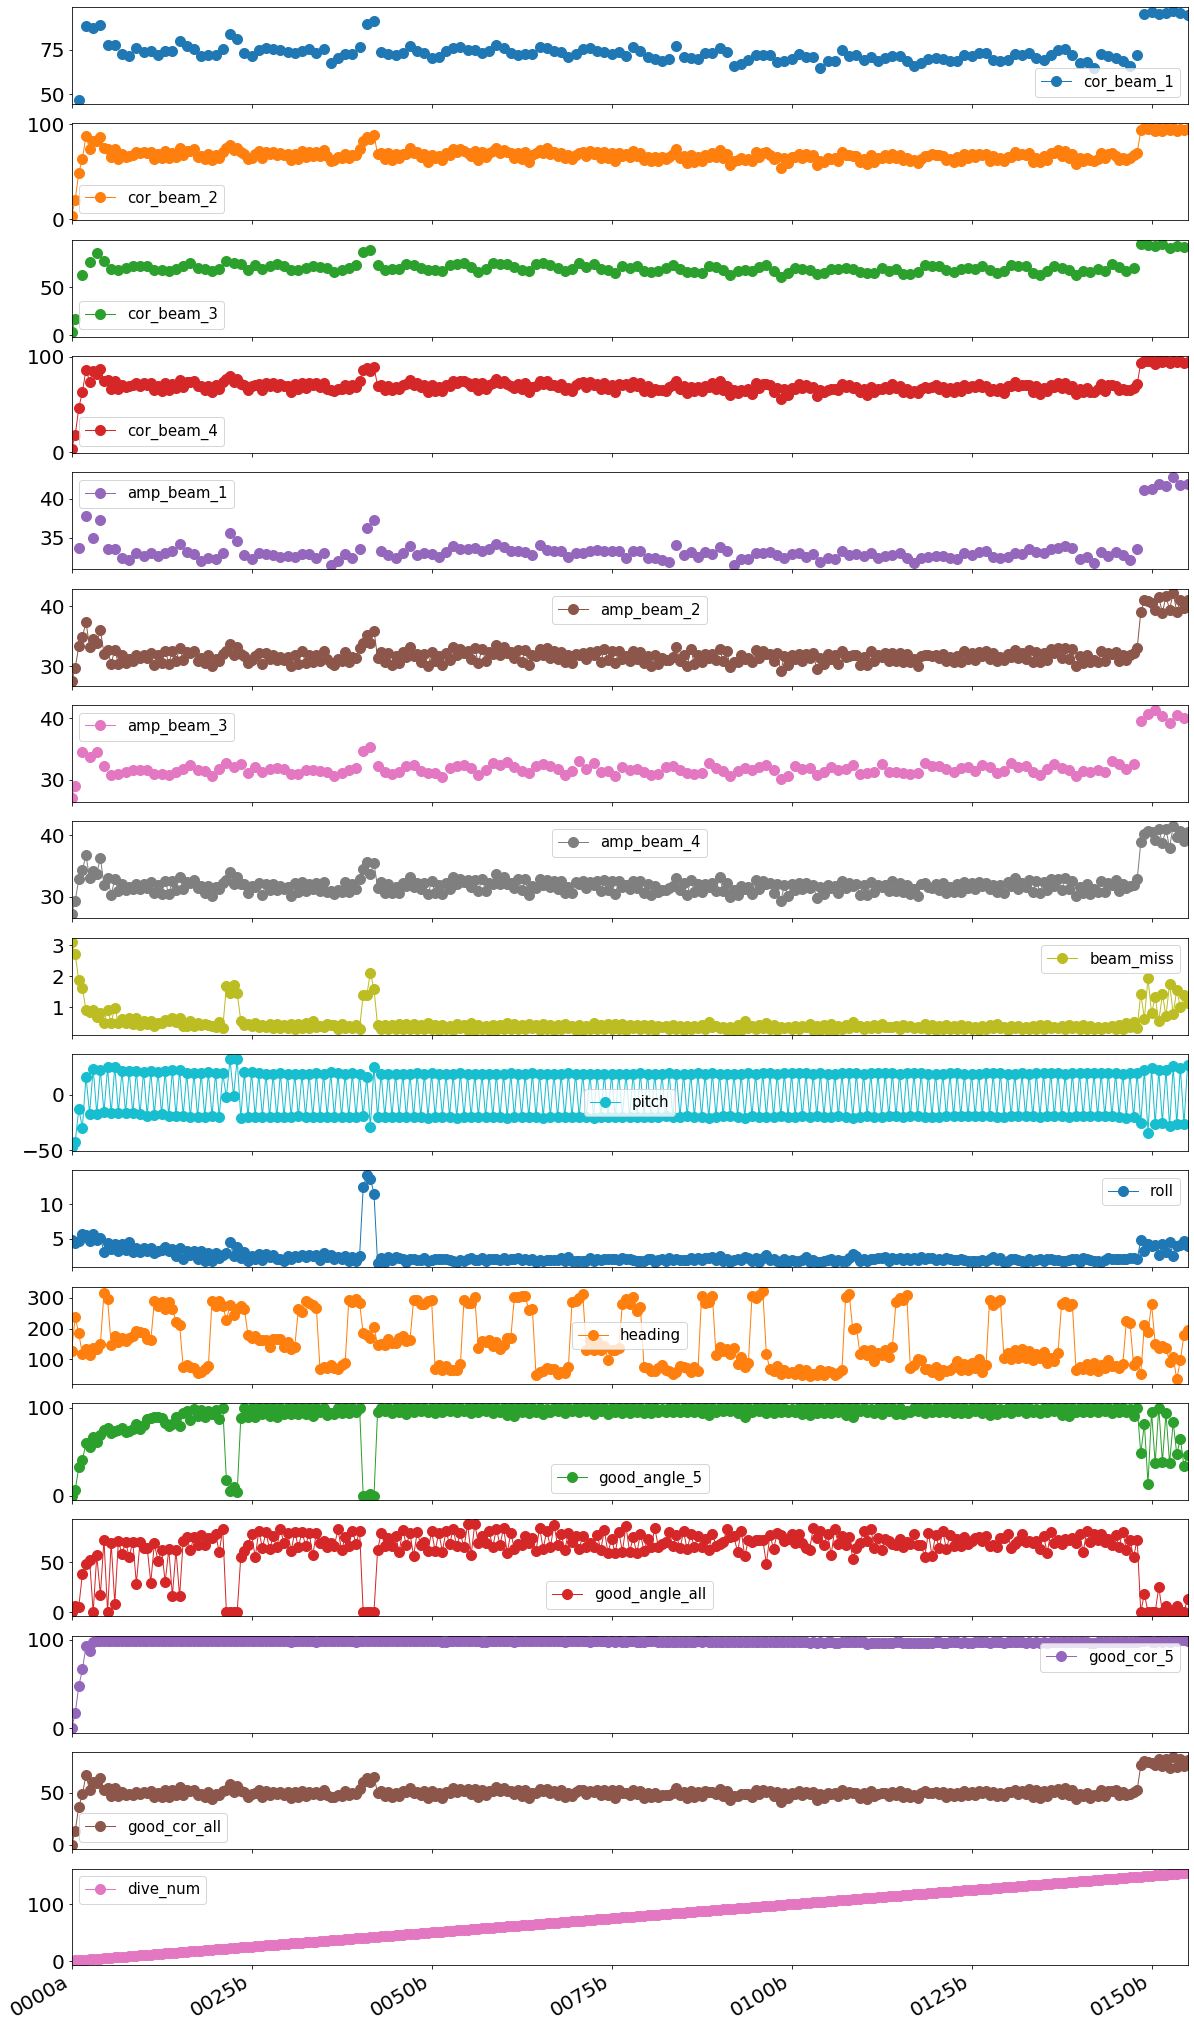

In [8]:
beam_attrs.plot(subplots=True,figsize=(20,40),marker='o');
savefig('beam_attributes')

In [9]:
len(np.arange(0,len(beam_attrs.index), 0.5)

SyntaxError: unexpected EOF while parsing (<ipython-input-9-499143de6554>, line 1)

### Plot some key QC parameters from each dive limb

In [ ]:
def plot_mission_qc(beam_attrs):
    fig, ax = plt.subplots(5,1, sharex=True, figsize=(14,15))
    ax = ax.ravel()
    ax[0].scatter(beam_attrs.dive_num, beam_attrs.cor_beam_1, label='correlation (%)')
    ax[1].scatter(beam_attrs.dive_num, beam_attrs.amp_beam_1, label='return amp (dB)')
    ax[2].scatter(beam_attrs.dive_num, np.abs(beam_attrs.pitch), label='|pitch|')
    ax[3].scatter(beam_attrs.dive_num, beam_attrs.roll, label='|roll|')
    ax[3].set(ylim = [0,15])
    ax[4].scatter(beam_attrs.dive_num, beam_attrs.beam_miss, label='Beam miss (m)')
    ax[4].set(ylim = [0,2])
    for axi in ax:
        axi.legend()
    return fig, ax

In [ ]:
fig, ax = plot_mission_qc(beam_attrs)
savefig('beam_attrs_short')

See which variables are correlated between the dive limbs

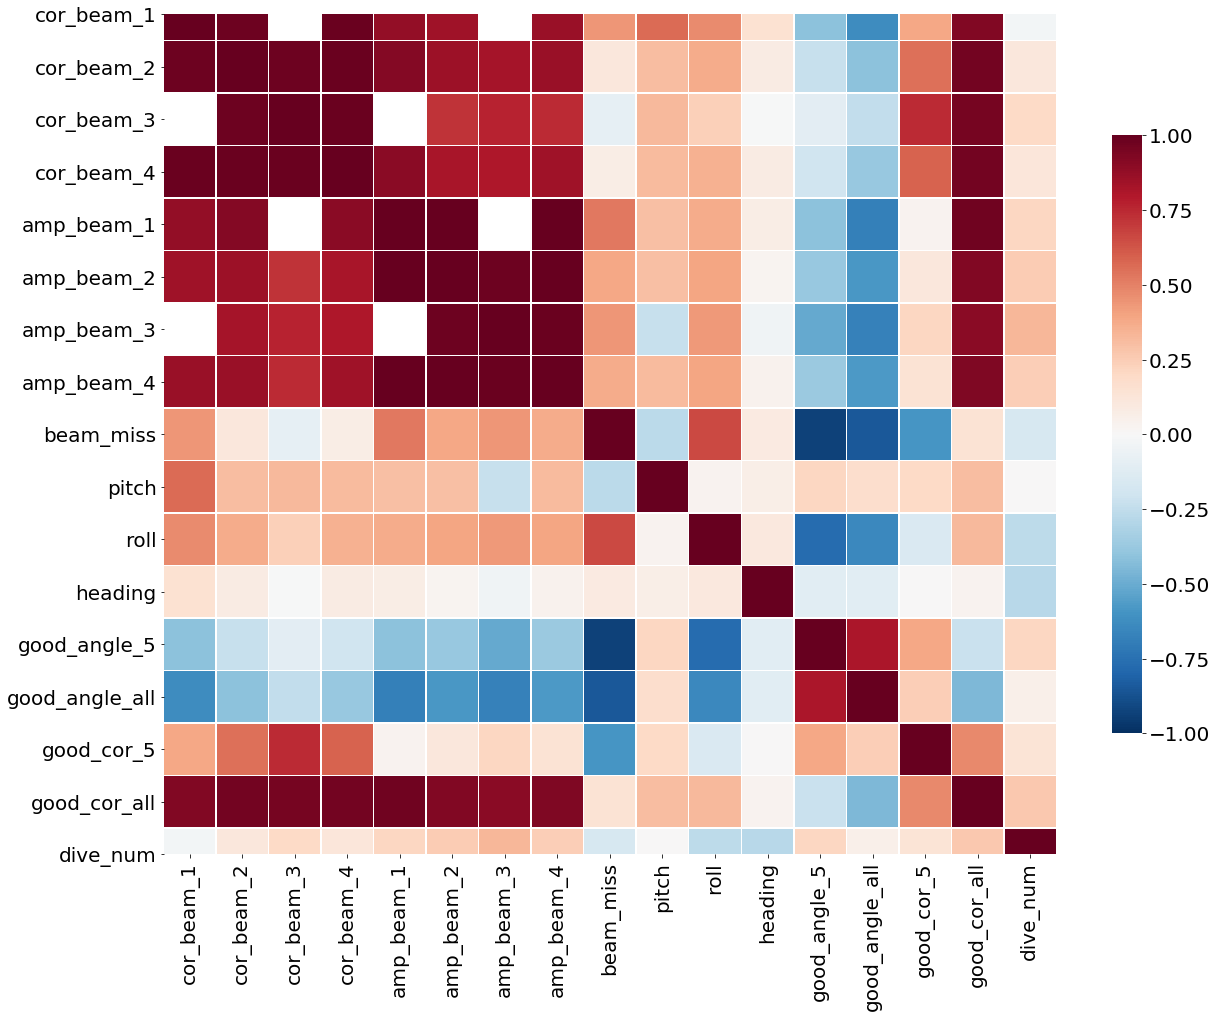

In [10]:
attr_corr = beam_attrs.corr()
mask = np.triu(np.ones_like(attr_corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 22))
sns.heatmap(attr_corr, cmap='RdBu_r', vmin=-1,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Load in glider attitude data for comparison with that from the ADCP

In [11]:
glider_df = read_glider_nc(glider_raw_path / 'sg637_var_by_var_timeseries.nc')
glider_df

,DAC_u,DAC_v,abs_salinity,conductivity,cons_temp,depth,direction,dive,dive_num,lat,...,rho,salinity,salinity_nocorr,sigma0,temp,roll,pitch,heading,w_H2O,glider_time
2020-01-23 14:35:40.870005,-0.086915,0.067255,35.601190,55.756318,26.966234,1.340919,-1.0,1.0,1.0,14.183558,...,1023.058349,35.433673,35.433673,1023.052657,26.980132,10.5,-50.6,97.6,-0.001678,2020-01-23 14:35:40.870005
2020-01-23 14:35:46.834999,-0.086915,0.067255,35.603420,55.764785,26.971367,1.350925,-1.0,1.0,1.0,14.183558,...,1023.058393,35.435892,35.429688,1023.052659,26.985348,1.4,-55.2,128.8,-0.005775,2020-01-23 14:35:46.834999
2020-01-23 14:35:54.732995,-0.086915,0.067255,35.606930,55.760288,26.962277,1.420973,-1.0,1.0,1.0,14.183558,...,1023.064184,35.439386,35.436477,1023.058152,26.976428,5.5,-60.7,117.6,-0.014122,2020-01-23 14:35:54.732995
2020-01-23 14:36:01.007001,-0.086915,0.067255,35.602092,55.760414,26.968761,1.551062,-1.0,1.0,1.0,14.183558,...,1023.059098,35.434570,35.433727,1023.052514,26.982740,-4.3,-64.2,128.3,-0.003273,2020-01-23 14:36:01.007001
2020-01-23 14:36:06.963999,-0.086915,0.067255,35.613115,55.773715,26.966560,1.461000,-1.0,1.0,1.0,14.183558,...,1023.067541,35.445541,35.442142,1023.061339,26.980960,11.2,-66.4,120.9,0.004194,2020-01-23 14:36:06.963999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-16 13:58:34.845004,-0.051334,0.010759,35.711591,55.535581,26.609093,4.433003,1.0,155.0,155.0,14.182905,...,1023.266623,35.543538,35.544124,1023.247789,26.628579,-6.3,37.0,209.2,0.007518,2020-02-16 13:58:34.845004
2020-02-16 13:58:39.844001,-0.051334,0.010759,35.712442,55.538801,26.611685,3.322260,1.0,155.0,155.0,14.182895,...,1023.261710,35.544391,35.544758,1023.247594,26.630946,-8.9,36.5,219.3,0.031021,2020-02-16 13:58:39.844001
2020-02-16 13:58:44.847001,-0.051334,0.010759,35.712793,55.540997,26.614226,1.861273,1.0,155.0,155.0,14.182887,...,1023.254955,35.544748,35.544210,1023.247047,26.633164,0.0,23.2,227.3,0.066397,2020-02-16 13:58:44.847001
2020-02-16 13:58:49.845003,-0.051334,0.010759,35.709934,55.538555,26.616121,1.290884,1.0,155.0,155.0,14.182883,...,1023.249822,35.541906,35.541011,1023.244337,26.634813,-8.5,6.1,234.2,0.064037,2020-02-16 13:58:49.845003


Here we import the DAC and surface drift calculated from the glider base station. They appear to be better.

In [12]:
def basestation_dac_drift(glider_df, path_to_ncs):
    """ Extracts surface drift and dive average current from Seaglider basestation dive netcdfs
    Adds these to a glider dataframe
    Takes a glider dataframe as an input
    Pass it a path to a directory containing files of pattern pNNNxxxx.nc 
    where NNN is Seaglider number, xxxx is dive number
    Returns a dataframe indexed by dive number, with surface drift and DACs in m/s"""
    files_path = path_to_ncs.rglob("p???????.nc")
    files_list = []
    for path in files_path:
        files_list.append(str(path))
    if len(files_list) == 0:
        print("Did not find any netcdf files of pattern pNNNxxxx.nc. Aborting")
        return "That path didn't have what I needed bud"
    files = np.sort(files_list)
    df = pd.DataFrame()
    for file_name in files:
        ds = xr.open_dataset(file_name)
        dive_no = int(ds.dive_number)
        dac_u = ds.depth_avg_curr_east.values.flatten()[0]
        dac_v = ds.depth_avg_curr_north.values.flatten()[0]
        drift_u = ds.surface_curr_east.values.flatten()[0]/100
        drift_v = ds.surface_curr_north.values.flatten()[0]/100
        line = {"dive_no":dive_no, "DAC_u_bs":dac_u, "DAC_v_bs":dac_v, "drift_u_bs":drift_u,  "drift_v_bs":drift_v}
        df = df.append(line, ignore_index=True)
    df.index = df.dive_no    
    df = df.drop("dive_no", axis=1)
    df_merge = pd.merge(glider_df, df, left_on="dive_num", right_on="dive_no", how="left", validate="m:1")
    return df_merge
glider_df = basestation_dac_drift(glider_df,Path('/media/callum/storage/Documents/foo/ego_glider_nc/data_from_basestaion'))
glider_df.index = glider_df.glider_time

Plot of pressume over time from the glider and AD2CP. Adjust limits to fit your data. A close fit shows that the clocks are synced well and the pressure sensors agree. If the blue and orange lines are not co-incident, you have an issue

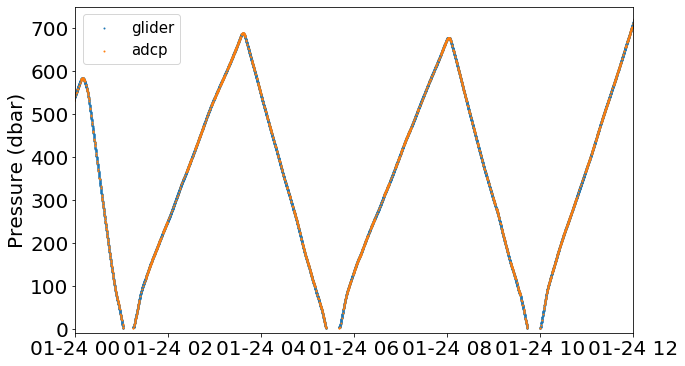

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(glider_df.index, glider_df.pressure, label='glider', s=1)
ax.scatter(adcp_df.index, adcp_df.pressure_ad, label='adcp', s=1)
ax.set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)],ylim = [-10,750], ylabel='Pressure (dbar)')
ax.legend()
savefig('pressure_glider_vs_adcp')

### Attitude comparison. A mismatch may indicate physcal misalignment of the glider and ADCP or a poor calibration of the accelerometers in either unit.

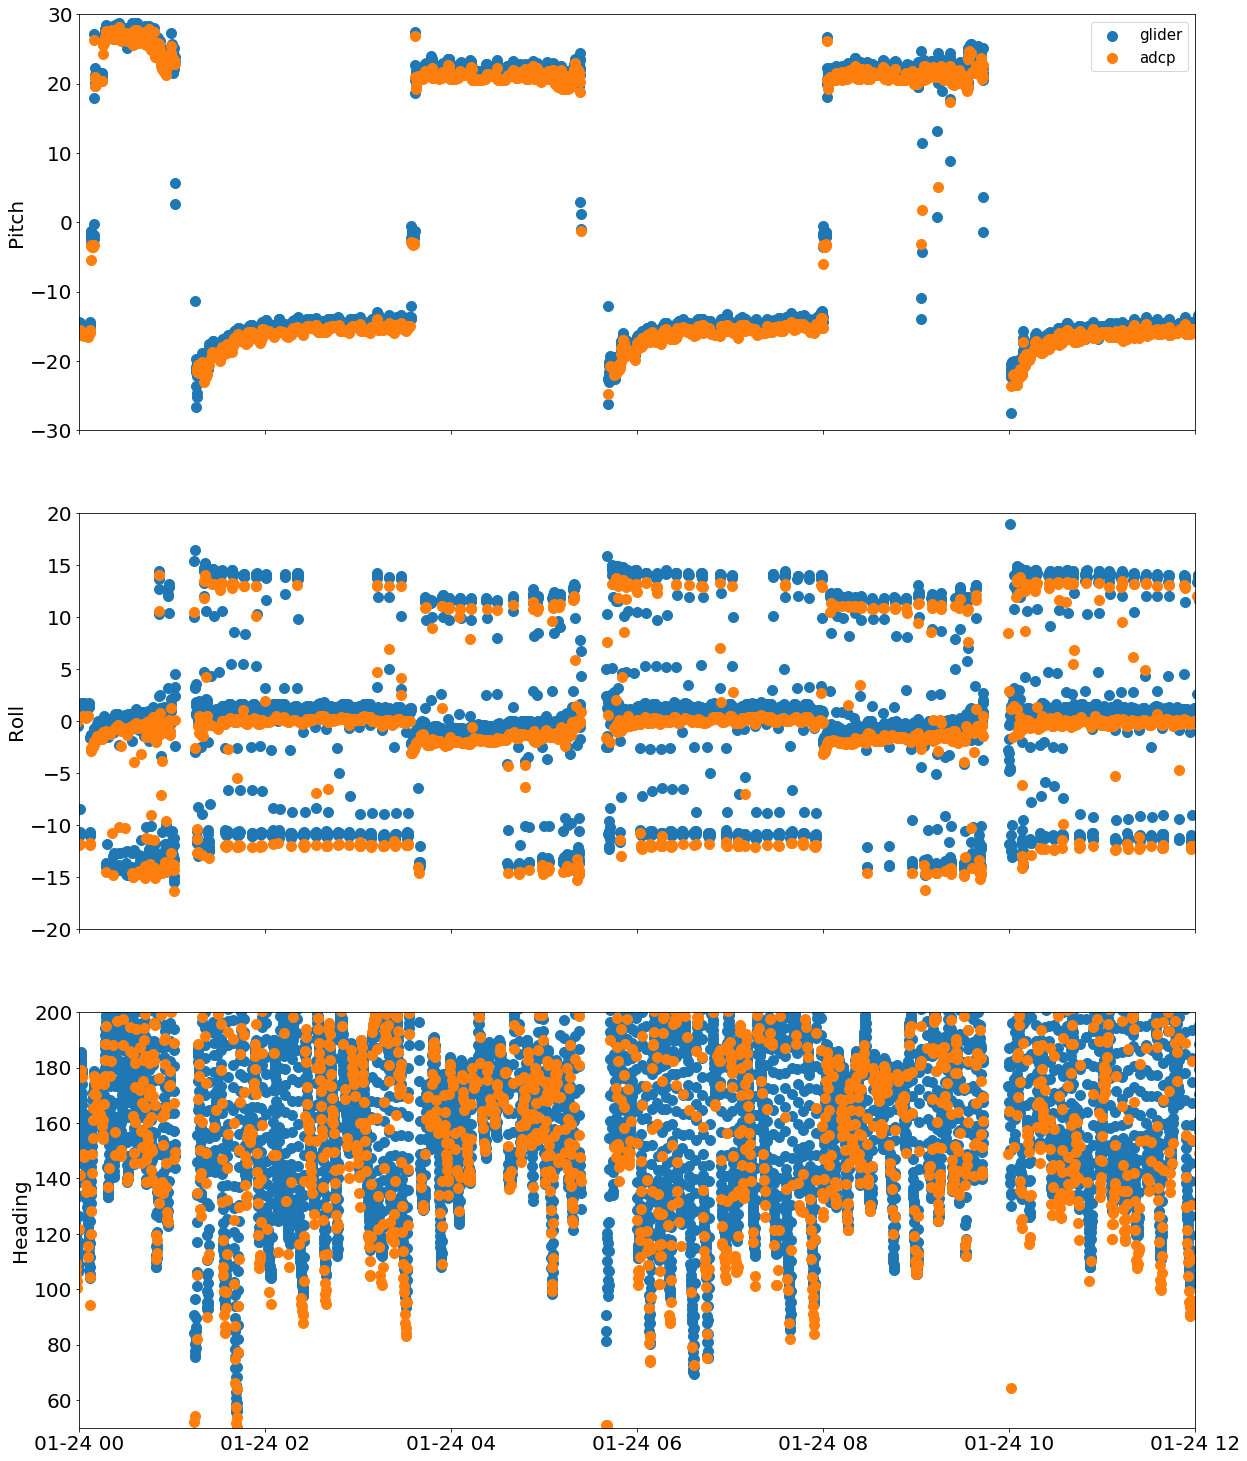

In [22]:
fig, ax = plt.subplots(3,1,figsize=(20,26), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_df.index, glider_df.pitch, label='glider')
ax[0].scatter(adcp_df.index, adcp_df.pitch_ad, label='adcp')
ax[0].set(xlim=[datetime(2020,1,24,0), datetime(2020,1,24,12)], ylim=[-30,30], ylabel='Pitch')
ax[1].scatter(glider_df.index, glider_df.roll)
ax[1].scatter(adcp_df.index, adcp_df.roll_ad)
ax[1].set(ylim=[-20,20], ylabel='Roll')
ax[2].scatter(glider_df.index, glider_df.heading)
ax[2].scatter(adcp_df.index, adcp_df.heading_ad)
ax[2].set(ylim=[50,200], ylabel='Heading')
ax[0].legend();
savefig('attitude_glider_vs_adcp')

### Merge the two on nearest datetime to directly compare

In [33]:
adcp_df['adcp_time'] = adcp_df.index
g_df = glider_df.drop('glider_time', axis=1)

In [73]:
# Setting a tolerance of 2 seconds to be considered coincident
df_merged = pd.merge_asof(adcp_df, g_df, left_on="adcp_time", right_on="glider_time",
              direction="nearest", tolerance=pd.Timedelta(seconds=2))

In [74]:
df_merged

,cast_num,pressure_ad,pitch_ad,roll_ad,heading_ad,adcp_time,DAC_u,DAC_v,abs_salinity,conductivity,...,sigma0,temp,roll,pitch,heading,w_H2O,DAC_u_bs,DAC_v_bs,drift_u_bs,drift_v_bs
0,0001a,2.644000,-49.439999,6.910000,51.949997,2020-01-23 14:35:43.438300,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001a,3.271000,-80.220001,7.950000,113.759995,2020-01-23 14:36:49.438500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001a,15.719001,-18.490000,0.260000,104.829994,2020-01-23 14:37:55.438500,-0.086915,0.067255,35.601743,55.705602,...,1023.071245,26.926415,1.4,-18.9,114.9,0.007643,-0.116304,0.041338,-0.262762,0.210089
3,0001a,24.392001,-20.180000,-0.210000,122.649994,2020-01-23 14:39:02.438500,-0.086915,0.067255,35.631943,55.764902,...,1023.090429,26.939227,1.0,-19.6,131.7,0.009636,-0.116304,0.041338,-0.262762,0.210089
4,0001a,32.826002,-20.539999,12.719999,133.470001,2020-01-23 14:40:08.438500,-0.086915,0.067255,35.751123,56.053068,...,1023.144782,27.050489,14.2,-19.7,135.3,0.012277,-0.116304,0.041338,-0.262762,0.210089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86879,0155b,16.558001,34.230000,-7.040000,193.559998,2020-02-16 13:57:52.438500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86880,0155b,12.810001,32.309998,-4.070000,201.339996,2020-02-16 13:58:07.438500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86881,0155b,8.951000,36.079998,-4.320000,201.009995,2020-02-16 13:58:22.438500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86882,0155b,5.070000,35.419998,-4.940000,212.569992,2020-02-16 13:58:37.438500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Seaborn linear regressions of attitude

In [59]:
import seaborn as sns

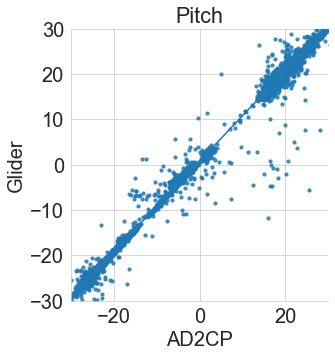

In [84]:
g = sns.lmplot(x='pitch_ad', y='pitch', data=df_merged,x_ci='sd', scatter_kws={"s": 10})
g.set(ylim=(-30, 30), xlim=(-30, 30), xlabel='AD2CP', ylabel='Glider', title='Pitch')
savefig('Pitch_correlation')

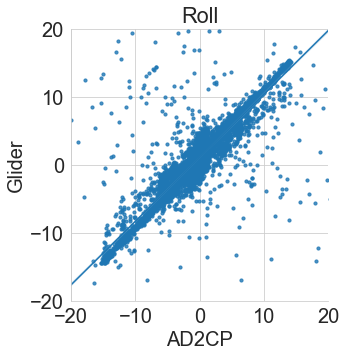

In [85]:
g = sns.lmplot(x='roll_ad', y='roll', data=df_merged,x_ci='sd', scatter_kws={"s": 10})
g.set(ylim=(-20, 20), xlim=(-20, 20),  xlabel='AD2CP', ylabel='Glider', title='Roll')
savefig('Roll_correlation')

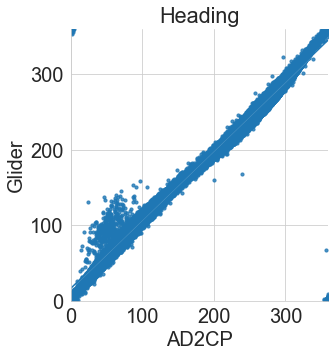

In [86]:
g = sns.lmplot(x='heading_ad', y='heading', data=df_merged,x_ci='sd', scatter_kws={"s": 10})
g.set(ylim=(0,360), xlim=(0, 360),  xlabel='AD2CP', ylabel='Glider', title='Heading')
savefig('Heading_correlation')

In [82]:
glider_av_df = glider_df.groupby('dive', as_index=False).mean()
glider_av_df

,dive,DAC_u,DAC_v,abs_salinity,conductivity,cons_temp,depth,direction,dive_num,lat,...,sigma0,temp,roll,pitch,heading,w_H2O,DAC_u_bs,DAC_v_bs,drift_u_bs,drift_v_bs
0,1.0,-0.086915,0.067255,35.788721,56.161199,27.072764,33.255417,0.011236,1.0,14.183564,...,1023.156603,27.101444,1.566292,-1.967416,134.550000,0.021829,-0.116304,0.041338,-0.262762,0.210089
1,2.0,-0.030349,0.051246,36.331019,56.832907,26.966292,53.898726,-0.003155,2.0,14.184418,...,1023.589441,27.021306,0.399685,-0.372871,129.073817,0.014357,NaN,NaN,NaN,NaN
2,3.0,0.019214,0.042060,36.758264,52.645783,22.459513,133.839393,-0.193585,3.0,14.184576,...,1025.215791,22.542531,-0.081672,-0.825659,138.452234,0.008559,-0.031615,0.018300,-0.218256,0.177261
3,4.0,0.029366,0.045095,36.757507,52.804025,22.612853,131.485829,-0.171717,4.0,14.181993,...,1025.172888,22.695500,-0.216723,-0.356453,142.740516,0.008026,-0.017697,0.026827,-0.196181,0.211037
4,5.0,-0.079353,0.085351,35.999590,45.054299,15.792682,281.282805,-0.326414,5.0,14.190437,...,1026.239108,15.864827,-0.309964,-1.652050,300.519564,0.004624,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151.0,-0.051134,0.057143,36.261759,55.978308,26.275016,56.721289,0.215827,151.0,14.181851,...,1023.757863,26.327814,0.293525,1.868345,143.435252,0.010802,NaN,NaN,NaN,NaN
151,152.0,-0.048079,0.070620,36.251827,55.901900,26.217864,56.198868,0.208791,152.0,14.181047,...,1023.768125,26.270034,-0.075458,1.900733,139.268132,0.015817,-0.084975,0.034164,NaN,NaN
152,153.0,-0.041833,0.095978,36.283008,56.001072,26.265208,55.731900,0.213235,153.0,14.181094,...,1023.776360,26.318556,1.999265,2.547059,110.813235,0.018283,NaN,NaN,-0.179117,0.055031
153,154.0,-0.132379,0.107633,36.203257,55.894416,26.273627,55.570657,0.200000,154.0,14.183195,...,1023.715216,26.323838,0.276400,2.684800,47.927600,0.020689,-0.084882,0.089629,NaN,NaN


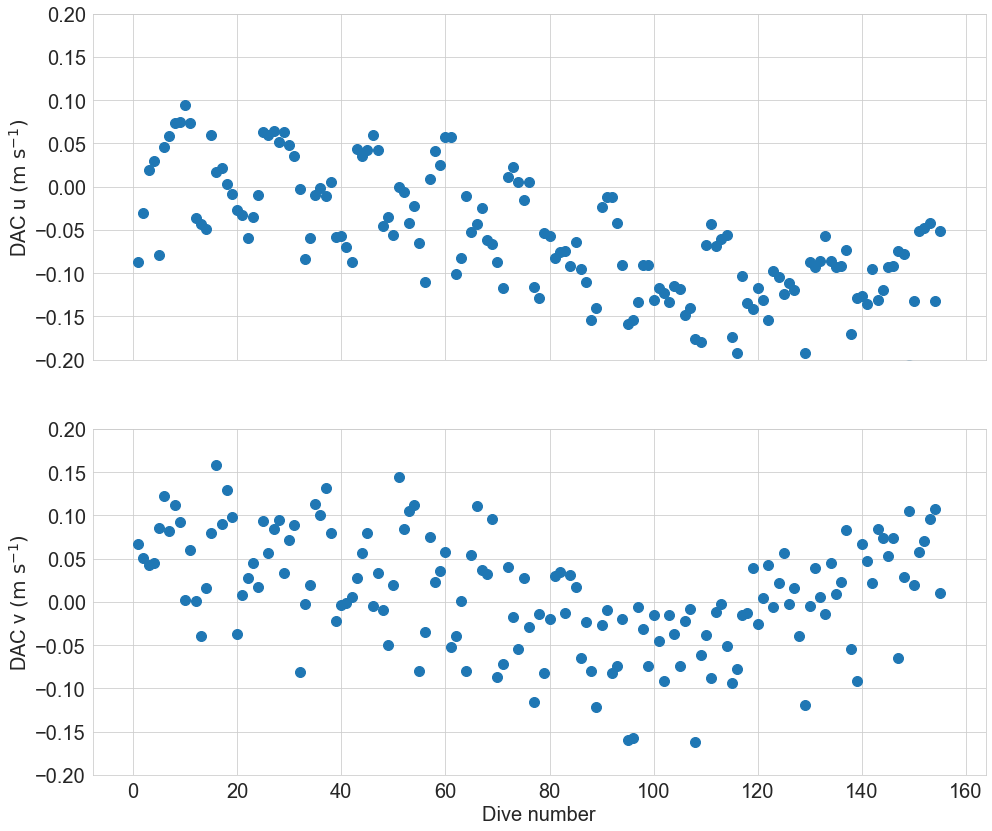

In [83]:
fig, ax = plt.subplots(2,1,figsize=(16,14), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_av_df.dive_num, glider_av_df.DAC_u)
ax[1].scatter(glider_av_df.dive_num, glider_av_df.DAC_v)
ax[0].set(ylabel='DAC u $(\mathrm{m\ s^{-1}})$', ylim=[-0.2, 0.2])
ax[1].set(ylabel='DAC v $(\mathrm{m\ s^{-1}})$', xlabel='Dive number', ylim=[-0.2, 0.2])
savefig('DAC_by_dive')

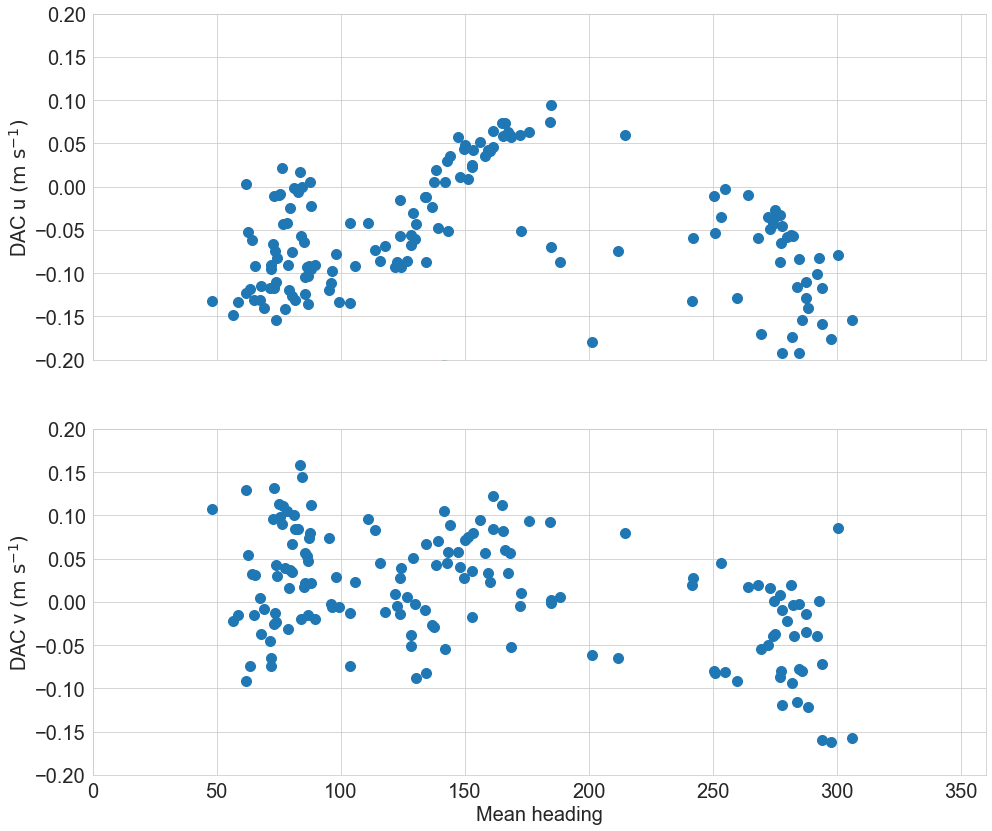

In [87]:
fig, ax = plt.subplots(2,1,figsize=(16,14), sharex=True)
ax = ax.ravel()
ax[0].scatter(glider_av_df.heading, glider_av_df.DAC_u)
ax[1].scatter(glider_av_df.heading, glider_av_df.DAC_v)
ax[0].set(ylabel='DAC u $(\mathrm{m\ s^{-1}})$', ylim=[-0.2, 0.2])
ax[1].set(ylabel='DAC v $(\mathrm{m\ s^{-1}})$', xlabel='Mean heading', ylim=[-0.2, 0.2], xlim=[0,360])
savefig('DAC_by_heading')

In [88]:
dive = mission_dict['0041a']
flagger = copy.deepcopy(dive.flag_bad_data)
for cell in range(np.size(flagger,1)):
    flagger[:,cell,:] = flagger[:,3,:]
dive_vel = copy.deepcopy(dive.vel_xyz)
dive_vel[:,1,0][:-1]

array([-0.1036236 , -0.1567636 , -0.36443241, -0.4179944 , -0.4172656 ,
       -0.42011439, -0.39616639, -0.33737401, -0.33238079, -0.38693319,
       -0.36897922, -0.40275319, -0.37953399, -0.39809119, -0.4313108 ,
       -0.36626641, -0.37531481, -0.38944722, -0.3320112 , -0.31782999,
       -0.33624081, -0.35738879, -0.34541479, -0.3356724 , -0.36250401,
       -0.345746  , -0.30518999, -0.2420564 , -0.25247519, -0.2938576 ,
       -0.27518879, -0.28601561, -0.2991368 , -0.2857088 , -0.2921072 ,
       -0.3138584 , -0.31401879, -0.3113304 , -0.3119476 , -0.2781736 ,
       -0.2610844 , -0.28140599, -0.2741776 , -0.2995936 , -0.2757572 ,
       -0.29978881, -0.37048201, -0.3339952 , -0.294426  , -0.26826039,
       -0.26224201, -0.2607008 , -0.30721239, -0.3441072 , -0.3203824 ,
       -0.28404201, -0.30141719, -0.30253999, -0.25094799, -0.2927244 ,
       -0.3106052 , -0.3015044 , -0.3036488 , -0.31413039, -0.30500521,
       -0.32542439, -0.3200372 , -0.2803076 , -0.2717752 , -0.28

In [90]:
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,0][:-1], label='x')

NameError: name 'foo' is not defined

In [ ]:
dive_vel[:,cell,0]

In [ ]:
mission_dict['0041b'].flag_bad_data[:,3,:]

In [ ]:
sub_df = asc_df[asc_df.dive_no== 41.0]
sub_df.describe()

In [ ]:
des_df.describe()

In [ ]:
asc_df.describe()

In [ ]:
sub_df = asc_df[asc_df.dive_no== 41.0]
sub_df.describe()asc_df.corr()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,10), sharey=True)
ax = ax.ravel()
ax[0].scatter(-des_df.u, des_df.w_from_p, s = 0.5, label='Dive')
ax[0].scatter(-asc_df.u, asc_df.w_from_p, s = 0.5, label='Climb')
ax[0].set(xlim=[0, 0.6], ylim=[-0.3, 0.3], xlabel='Glider forward speed from ADCP', ylabel='Vertical speed from pressure')
ax[0].legend()

ax[1].scatter(-des_df.v, des_df.w_from_p, s = 0.5, label='Dive')
ax[1].scatter(-asc_df.v, asc_df.w_from_p, s = 0.5, label='Climb')
ax[1].set(xlim=[-0.2,0.2], ylim=[-0.3, 0.3], xlabel='Glider cross speed from ADCP')
savefig('all_speed_pressure')


In [ ]:
g = sns.jointplot(des_df.u, des_df.w_from_p, height=12, space=0, xlim=(-0.6, 0.0), ylim=(-0.3, -0.04))
savefig('seaborn_den_scat')

In [ ]:
g = sns.jointplot(asc_df.u, asc_df.w_from_p, kind="kde", height=12, space=0, xlim=(-1, 0.2), ylim=(0.06, 0.14))

In [ ]:
asc_df.corr()

Plot the xyz velocites from one dive cycle. Upper panel dive, lower panel climb

In [ ]:
foo = mission_dict['0061a']
bar = mission_dict['0061b']

Plot velocities beam by beam

In [ ]:
v_lim = 0.3
fig,ax = plt.subplots(3,2,figsize=(15,15), sharex='col', sharey='row')
ax = ax.ravel()
ax[0].scatter(foo.time,foo.vel_beam[:,0,0])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[1].scatter(bar.time,bar.vel_beam[:,0,0])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[2].scatter(foo.time,foo.vel_beam[:,0,1])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[3].scatter(bar.time,bar.vel_beam[:,0,1])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[4].scatter(foo.time,foo.vel_beam[:,0,2])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[5].scatter(bar.time,bar.vel_beam[:,0,2])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)

ax[0].set(ylim=[-v_lim, v_lim])
ax[2].set(ylim=[-v_lim, v_lim], ylabel='Beam velocity bin 1 (m/s)')
ax[4].set(xlim=[foo.time[0], foo.time[-1]], ylim=[-v_lim, v_lim])
ax[5].set(xlim=[bar.time[0], bar.time[-1]])

ax[0].text(0.6, 0.8, 'Descent beam 1',transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, 'Ascent beam 1',transform=ax[1].transAxes)
ax[2].text(0.6, 0.5, 'Descent beam 2',transform=ax[2].transAxes)
ax[3].text(0.6, 0.8, 'Ascent beam 2',transform=ax[3].transAxes)
ax[4].text(0.6, 0.8, 'Descent beam 3',transform=ax[4].transAxes)
ax[5].text(0.6, 0.8, 'Ascent beam 3',transform=ax[5].transAxes)
fig.autofmt_xdate()
#savefig('beam_velocities')

In [ ]:
v_lim = 0.3
fig,ax = plt.subplots(3,2,figsize=(15,15), sharex='col', sharey='row')
ax = ax.ravel()
ax[0].scatter(foo.time,foo.vel_xyz[:,0,0])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[1].scatter(bar.time,bar.vel_xyz[:,0,0])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[2].scatter(foo.time,foo.vel_xyz[:,0,1])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[3].scatter(bar.time,bar.vel_xyz[:,0,1])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[4].scatter(foo.time,foo.vel_xyz[:,0,2])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[5].scatter(bar.time,bar.vel_xyz[:,0,2])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)

ax[0].set(ylim=[-v_lim, v_lim])
ax[2].set(ylim=[-v_lim, v_lim], ylabel='Beam velocity bin 1 (m/s)')
ax[4].set(xlim=[foo.time[0], foo.time[-1]], ylim=[-v_lim, v_lim])
ax[5].set(xlim=[bar.time[0], bar.time[-1]])

ax[0].text(0.6, 0.8, 'Descent along glider',transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, 'Ascent along glider',transform=ax[1].transAxes)
ax[2].text(0.6, 0.5, 'Descent across glider',transform=ax[2].transAxes)
ax[3].text(0.6, 0.8, 'Ascent across glider',transform=ax[3].transAxes)
ax[4].text(0.6, 0.8, 'Descent glider up',transform=ax[4].transAxes)
ax[5].text(0.6, 0.8, 'Ascent glider up' , transform=ax[5].transAxes)
fig.autofmt_xdate()

In [ ]:
v_lim = 0.3
fig,ax = plt.subplots(3,2,figsize=(15,15), sharex='col', sharey='row')
ax = ax.ravel()
ax[0].scatter(foo.time,foo.vel_enu[:,0,0])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[1].scatter(bar.time,bar.vel_enu[:,0,0])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[2].scatter(foo.time,foo.vel_enu[:,0,1])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[3].scatter(bar.time,bar.vel_enu[:,0,1])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[4].scatter(foo.time,foo.vel_enu[:,0,2])#, c = foo.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)
ax[5].scatter(bar.time,bar.vel_enu[:,0,2])#, c = bar.roll, cmap='RdBu', vmin=-5, vmax=5, s = 10)

ax[0].set(ylim=[-v_lim, v_lim])
ax[2].set(ylim=[-v_lim, v_lim], ylabel='Beam velocity bin 1 (m/s)')
ax[4].set(xlim=[foo.time[0], foo.time[-1]], ylim=[-v_lim, v_lim])
ax[5].set(xlim=[bar.time[0], bar.time[-1]])

ax[0].text(0.6, 0.8, 'Descent beam 1',transform=ax[0].transAxes)
ax[1].text(0.6, 0.8, 'Ascent beam 1',transform=ax[1].transAxes)
ax[2].text(0.6, 0.5, 'Descent beam 2',transform=ax[2].transAxes)
ax[3].text(0.6, 0.8, 'Ascent beam 2',transform=ax[3].transAxes)
ax[4].text(0.6, 0.8, 'Descent beam 3',transform=ax[4].transAxes)
ax[5].text(0.6, 0.8, 'Ascent beam 3',transform=ax[5].transAxes)
fig.autofmt_xdate()

In [ ]:
sub_df = asc_df[asc_df.dive_no== 41.0]
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(sub_df.w_from_p, sub_df.u)
#ax.set(xlim=[-0.5, 0.5], ylim=[-0.5, 0.5])

In [ ]:
sub_df

In [ ]:
dive = mission_dict['0041a']
flagger = copy.deepcopy(dive.flag_bad_data)
for cell in range(np.size(flagger,1)):
    flagger[:,cell,:] = flagger[:,3,:]
dive_vel = copy.deepcopy(dive.vel_xyz)
dive_vel[:,1,0][:-1]

In [ ]:
np.round(edgetocentre(foo.vel_xyz[:,1,0]) - des_df.u.values,2)

In [ ]:
des_df.u

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,1][:-1], label='y')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='xyz water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,1][:-1], label='y')
#ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')
#savefig('xyz_vel_dive41')

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(tl, -foo.measurement_z, c=foo.cor_beam[:,:,2],  label='x')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,1][:-1], label='y')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_xyz[:,1,2][:-1], label='z')
#ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='xyz water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,1][:-1], label='y')
#ax[1].scatter(-bar.glider_w_from_p,bar.vel_xyz[:,1,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')
#savefig('xyz_vel_dive41')

In [ ]:
foo.cor_beam[:,:,2]
foo.measurement_z
tl = np.transpose(np.tile(foo.time, (15,1)))
tl2 = np.transpose(np.tile(bar.time, (15,1)))

In [ ]:
fig, ax = plt.subplots(figsize=(12,14))

mp0 = ax.scatter(tl, foo.measurement_z, c=foo.cor_beam[:,:,2], vmin=0, vmax=100,cmap='RdBu',s=10)
ax.scatter(tl2, bar.measurement_z, c=bar.cor_beam[:,:,2], vmin=0, vmax=100,cmap='RdBu',s=10)
fig.colorbar(ax = ax,mappable=mp0, label='Ping correlation %')
ax.set(xlim=[tl[0,0], tl2[-1,-1]], ylabel='z (m)')
savefig('correlation')

In [ ]:
fig, ax = plt.subplots(figsize=(12,14))

mp0 = ax.scatter(tl, foo.measurement_z, c=foo.beam_miss, vmin=0, vmax=2,cmap='RdBu_r',s=10)
ax.scatter(tl2, bar.measurement_z, c=bar.beam_miss, vmin=0, vmax=2,cmap='RdBu_r',s=10)
fig.colorbar(ax = ax,mappable=mp0, label='Beam miss (m)')
ax.set(xlim=[tl[0,0], tl2[-1,-1]], ylabel='z (m)')
savefig('beam_miss')

In [ ]:
foo.beam_miss

In [ ]:
np.shape(foo.measurement_z)

As above for enu velocites

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,14), sharex=False)
ax = ax.ravel()
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,0][:-1], label='x')
ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,1][:-1], label='y')
#ax[0].scatter(-foo.glider_w_from_p,foo.vel_enu[:,0,2][:-1], label='z')
ax[0].set(xlim=[0,0.2], ylim=[-0.4,0.4],ylabel='water velocity from ADCP m/s')
ax[0].legend()
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,0][:-1], label='x')
ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,1][:-1], label='y')
#ax[1].scatter(-bar.glider_w_from_p,bar.vel_enu[:,0,2][:-1], label='z')
ax[1].set(xlim=[-0.25,0.], ylim=[-0.4,0.4], xlabel='w from pressure m/s')
savefig('enu_vel_dive41')

In [ ]:
all_the_shear = np.empty((len(mission_dict),100,3))
all_the_amp = np.empty((len(mission_dict),100,3))

in_bin = np.empty((len(mission_dict), 100))
for i, dive in enumerate(mission_dict.keys()):
    all_the_shear[i,:,:] = mission_dict[dive].vel_referenced
    in_bin[i,:] = mission_dict[dive].no_in_bin
    all_the_amp[i,:] = mission_dict[dive].amp_binned


In [ ]:
np.shape(all_the_amp)

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
nos = ax.pcolor(np.arange(0,len(overview.index)/2,0.5), np.arange(-1000,10,10),np.transpose(np.nanmean(all_the_amp,2)),vmin=30, vmax=40, cmap='RdBu')
ax.set(ylim=[-760,0], ylabel='z (m)', xlabel='Dive number', label='return_amp')
fig.colorbar(mappable=nos,ax=ax)
savefig('return_amp')

Check how many adcp velocity shear measurements were used in each cell of the velocity profile

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
nos = ax.pcolor(np.arange(0,len(overview.index)/2,0.5), np.arange(-1000,10,10),np.transpose(in_bin), vmin=0, vmax=100, cmap='viridis')
ax.set(ylim=[-760,0], ylabel='z (m)', xlabel='Dive number')
fig.colorbar(mappable=nos,ax=ax, label='number of shear estimates per bin', extend='max')
savefig('vels_per_10m_bin')

Plot the shear profiles

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(15,30), sharex=True)
ax = ax.ravel()
ax[0].pcolor(np.transpose(all_the_shear[201:250,:,0]), cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax[1].pcolor(np.transpose(all_the_shear[201:250,:,1]), cmap='RdBu_r', vmin=-0.5, vmax=0.5)

-------------------
# Rough stuff